In [1]:
from sympy import *
import numpy as np

import matplotlib.pyplot as plt

def L2_inner_product(f, g, tau):
    # you can define t here to not rely on a global definition
    t = symbols('t', real=True)
    return (integrate(f*conjugate(g), (t, 0, tau))/tau).simplify()

def L2_norm(f, tau):
    return sqrt(L2_inner_product(f, f, tau))

def L2_coefficient(f, g, tau):
    return (L2_inner_product(f, g, tau)/L2_norm(g, tau)**2).simplify()

# Function to Approximate

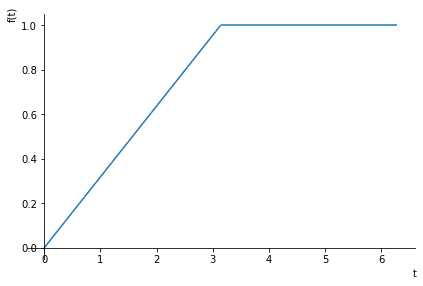

In [2]:
t = symbols('t', real=True)
f = Piecewise(
    (t/pi, t < pi),   # t is zero before time pi
    (1, t < 2*pi),      # otherwise, t is 1
)
plot(f, (t, 0, 2*pi))

# Fourier Series using $\{e^{-ikt}\}$, $k=[-\infty, \dots, \infty]$ as Basis

In [3]:
k = symbols('k', real=True, integer=True)
tau = 2*pi
w0 = 2*pi/tau
psi_k = exp(-I*k*w0*t)

ak = L2_coefficient(f, psi_k, tau)

ak

Piecewise((((-1)**k - I*pi*k - 1)/(2*pi**2*k**2), Ne(k, 0)), (3/4, True))

In [4]:
ak.subs(k, -k)

Piecewise(((I*pi*k - 1 + (-1)**(-k))/(2*pi**2*k**2), Ne(k, 0)), (3/4, True))

In [5]:
alpha_k = (ak.subs(k, -k) + ak).simplify()
alpha_k

Piecewise((((-1)**k - 1)/(pi**2*k**2), Ne(k, 0)), (3/2, True))

In [6]:
beta_k =(I*(ak.subs(k, -k) - ak)).simplify()
beta_k

Piecewise((-1/(pi*k), Ne(k, 0)), (0, True))

In [7]:
a0 = L2_coefficient(f, 1, tau)
a0

3/4

In [8]:
# this is just a fancy way to make sympy print the left hand side of the equation "a_k = "
# otherwise if will just print the right hand side

Eq(symbols('\psi_k'), psi_k)

Eq(\psi_k, exp(-I*k*t))

In [9]:
Eq(symbols('a_k'), ak)

Eq(a_k, Piecewise((((-1)**k - I*pi*k - 1)/(2*pi**2*k**2), Ne(k, 0)), (3/4, True)))

$approx = a_0*\psi_0 + a_1*\psi_1 + a_{-1}*\psi_{-1} + \ldots$

$\alpha_k = a_k + a_{-k}$

In [10]:
alpha_k = ak + ak.subs(k, -k)
alpha_k

Piecewise((((-1)**k - I*pi*k - 1)/(2*pi**2*k**2), Ne(k, 0)), (3/4, True)) + Piecewise(((I*pi*k - 1 + (-1)**(-k))/(2*pi**2*k**2), Ne(k, 0)), (3/4, True))

$\beta_k = i(a_{-k} - a_{k})$

In [11]:
beta_k = I*(ak.subs(k, -k) - ak)
beta_k

I*(-Piecewise((((-1)**k - I*pi*k - 1)/(2*pi**2*k**2), Ne(k, 0)), (3/4, True)) + Piecewise(((I*pi*k - 1 + (-1)**(-k))/(2*pi**2*k**2), Ne(k, 0)), (3/4, True)))

# Power Spectrum

In [12]:
ak

Piecewise((((-1)**k - I*pi*k - 1)/(2*pi**2*k**2), Ne(k, 0)), (3/4, True))

In [13]:
ak.subs(k, 0)

3/4

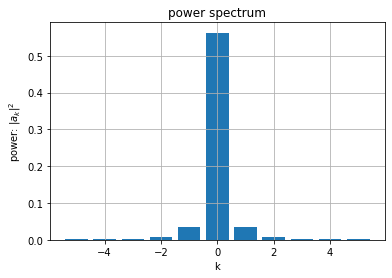

In [14]:
# there isn't a great way to do scatter plots in sympy, so we will plot our 
# power spectrum using the matplotlib library, imported at the top of this
# notebook
k = symbols('k', real=True, integer=True)
n = 5
k_values = np.arange(-n, n+1)
ak_list = np.array([N(ak.subs(k, ki)) for ki in k_values], dtype=complex)
power = abs(ak_list)**2

# this is building a list of power values evaluating the function
# using list comprehension, a short way to write for loops
# https://www.programiz.com/python-programming/list-comprehension
plt.bar(k_values, power)
plt.xlabel('k')
plt.ylabel('power: $|a_k|^2$')
plt.title('power spectrum')
plt.grid()

# Using $\{1, \cos(2\pi k t/\tau), \sin(2\pi k t/\tau\}$ as Basis

In [15]:
psi_1k = cos(k*t*2*pi/tau)
Eq(symbols('\psi_1k'), psi_1k)

Eq(\psi_1k, cos(k*t))

In [16]:
alpha_k = L2_coefficient(f, psi_1k, tau)
Eq(symbols('alpha_k'), alpha_k)

Eq(alpha_k, Piecewise((((-1)**k - 1)/(pi**2*k**2), Ne(k, 0)), (3/4, True)))

In [17]:
psi_2k = sin(k*t*2*pi/tau)
Eq(symbols('\psi_2k'), psi_2k)

Eq(\psi_2k, sin(k*t))

In [18]:
beta_k = L2_coefficient(f, psi_2k, tau)
Eq(symbols('beta_k'), beta_k)

Eq(beta_k, Piecewise((-1/(pi*k), Ne(k, 0)), (nan, True)))

In [19]:
psi_1 = 1
a_0 = L2_coefficient(f, psi_1, tau)
Eq(symbols('a_0'), a_0)

Eq(a_0, 3/4)

In [20]:
approx = a_0
for k_i in range(1, n+1):
    approx += (alpha_k*psi_1k + beta_k*psi_2k).subs(k, k_i)
    print(approx)

-sin(t)/pi - 2*cos(t)/pi**2 + 3/4
-sin(t)/pi - sin(2*t)/(2*pi) - 2*cos(t)/pi**2 + 3/4
-sin(t)/pi - sin(2*t)/(2*pi) - sin(3*t)/(3*pi) - 2*cos(t)/pi**2 - 2*cos(3*t)/(9*pi**2) + 3/4
-sin(t)/pi - sin(2*t)/(2*pi) - sin(3*t)/(3*pi) - sin(4*t)/(4*pi) - 2*cos(t)/pi**2 - 2*cos(3*t)/(9*pi**2) + 3/4
-sin(t)/pi - sin(2*t)/(2*pi) - sin(3*t)/(3*pi) - sin(4*t)/(4*pi) - sin(5*t)/(5*pi) - 2*cos(t)/pi**2 - 2*cos(3*t)/(9*pi**2) - 2*cos(5*t)/(25*pi**2) + 3/4


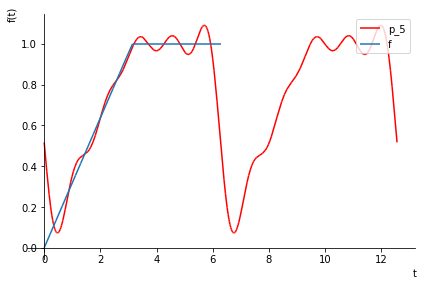

In [21]:
fig = plot(approx, f, (t, 0, 4*pi), legend=True, show=False)
fig[0].line_color='r'
fig[0].label = 'p_' + str(n)
fig[1].label = 'f'
fig.show()

In [22]:
approx

-sin(t)/pi - sin(2*t)/(2*pi) - sin(3*t)/(3*pi) - sin(4*t)/(4*pi) - sin(5*t)/(5*pi) - 2*cos(t)/pi**2 - 2*cos(3*t)/(9*pi**2) - 2*cos(5*t)/(25*pi**2) + 3/4